In [ ]:
#Mount our google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
url = '1hiayuEMSil4WUD8Z43dNP_O_ZrlsO3Dg'
gdd.download_file_from_google_drive(file_id = url,dest_path='./merged_dataset.csv',unzip=True)

Unzipping...

/usr/local/lib/python3.7/dist-packages/google_drive_downloader/google_drive_downloader.py:78: UserWarning: Ignoring `unzip` since "1hiayuEMSil4WUD8Z43dNP_O_ZrlsO3Dg" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/merged_dataset.csv')
df.head(5)

,Unnamed: 0,label,full_text
0,0,0,!!! rt @mayasolovely: woman complain clean hou...
1,1,1,!!!!! rt @mleew17: boy dat cold...tyga dwn bad...
2,2,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3,3,1,!!!!!!!!! rt @c_g_anderson: @viva_bas look lik...
4,4,1,!!!!!!!!!!!!! rt @shenikaroberts: shit hear mi...


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM, Bidirectional
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.constraints import maxnorm
from tensorflow.keras.utils import to_categorical

tweets = list(df['full_text'])
labels= list(df['label'])
print('labels: ',labels)

# Feature extraction
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# integer encode the documents
sequences = tokenizer.texts_to_sequences(tweets)

maxlen = 14
X = pad_sequences(sequences, maxlen=maxlen)
y = to_categorical(labels, 2)
print('X shape',X.shape)
print('y shape',y.shape)
print('X',X)
print('y',y)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
print('training dataset len:', len(X_train))
print('testing dataset len:', len(X_test))
print('X train',X_train)
print('y train',y_train)
print('X test',X_test)
print('y test',y_test)

# Prepare hyperparameters
vocab_size = len(word_index)+1
output_dim = 32

# LSTM variant
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = output_dim, input_length = maxlen))
model.add(Bidirectional(LSTM(output_dim, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(output_dim, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(output_dim, kernel_constraint=maxnorm(3))))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
warnings.filterwarnings("ignore")

labels:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 14, 32)            1574560   
                                                                 
 bidirectional_1 (Bidirectio  (None, 14, 64)           16640     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 64)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 14, 64)           24832     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 64)            0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)              

In [ ]:
import time
start = time.time()

# Fit the model to the training set
lstm_hist = model.fit(X_train, y_train, epochs=10, validation_split=0.3)
# Final evaluation of the model
warnings.filterwarnings("ignore")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
warnings.filterwarnings("ignore")
end = time.time()
total = (end-start)/60
print('Training duration(minutes): {}'.format(total))

Epoch 1/10
1034/1034 [==============================] - 32s 19ms/step - loss: 0.4987 - accuracy: 0.7305 - val_loss: 0.4545 - val_accuracy: 0.7607
Epoch 2/10
1034/1034 [==============================] - 18s 18ms/step - loss: 0.4265 - accuracy: 0.7892 - val_loss: 0.4481 - val_accuracy: 0.7624
Epoch 3/10
1034/1034 [==============================] - 18s 18ms/step - loss: 0.3974 - accuracy: 0.8086 - val_loss: 0.4418 - val_accuracy: 0.7713
Epoch 4/10
1034/1034 [==============================] - 18s 18ms/step - loss: 0.3723 - accuracy: 0.8274 - val_loss: 0.4813 - val_accuracy: 0.7675
Epoch 5/10
1034/1034 [==============================] - 18s 18ms/step - loss: 0.3451 - accuracy: 0.8436 - val_loss: 0.4908 - val_accuracy: 0.7678
Epoch 6/10
1034/1034 [==============================] - 18s 18ms/step - loss: 0.3191 - accuracy: 0.8602 - val_loss: 0.4704 - val_accuracy: 0.7799
Epoch 7/10
1034/1034 [==============================] - 18s 18ms/step - loss: 0.2939 - accuracy: 0.8718 - val_loss: 0.4937 -

In [ ]:
# Save the LSTM model
model.save('lstm.h5')

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix,f1_score,classification_report
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()

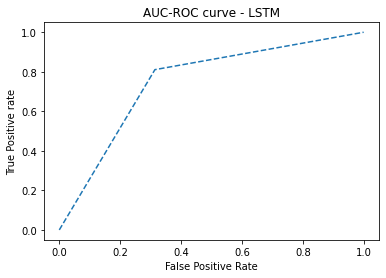

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow import keras

lstm_model = keras.models.load_model('./lstm.h5')
y_pred = np.argmax(lstm_model.predict(X_test),axis=-1)
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(np.argmax(y_test,axis=-1), y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, linestyle='--', label='LSTM (auc = %0.3f)' % auc_keras)
plt.title('AUC-ROC curve - LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
auc_score = roc_auc_score(np.argmax(y_test,axis=-1), y_pred)

True positive =  18684
False positive =  5248
False negative =  5515
True negative =  38049




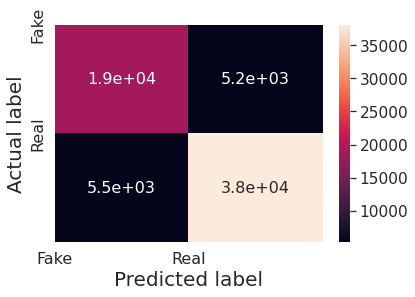

f1 score (LSTM) : 0.8760893841885311 

Classification report : 
              precision    recall  f1-score   support

           0       0.77      0.78      0.78     23932
           1       0.88      0.87      0.88     43564

    accuracy                           0.84     67496
   macro avg       0.83      0.83      0.83     67496
weighted avg       0.84      0.84      0.84     67496



In [ ]:
from tensorflow import keras
lstm_model = keras.models.load_model('./lstm.h5')

print_confusion_matrix(labels, np.argmax(lstm_model.predict(X),axis=-1))
f1 = f1_score(labels, np.argmax(lstm_model.predict(X),axis=-1))
cr = classification_report(labels, np.argmax(lstm_model.predict(X),axis = -1))
print(f'f1 score (LSTM) : {f1} \n')
print(f'Classification report : \n{cr}')